In [1]:
#written 12 July 2016 by djd.
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

<div style="font-size:12pt;color:#999999"> </div>
<div style="font-size:14pt;color:#000000">Hood To Coast 2016</div>
<div style="font-size:14pt;color:#000000"><strong>Leg Assigments for Team Midwest Express</strong></div>
<br></br>
<div style="font-size:14pt;color:#000000">based on stated preferences:</div>

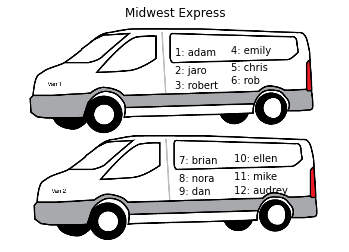

In [36]:
legs=[1,2,3,4,5,6,7,8,9,10,11,12]
preferences={'adam':None,
             'audrey':[7,8,12],
             'brian':[10,7,3],
             'chris':[2,5,6],
             'dan':[5,9,6],
             'ellen':[6,8,10],
             'emily':[4,1,11],
             'jaro':None,
             'mike':None,
             'nora':[6,8,3],#,10,7,11,12,1],
             'rob':[6,5,10],
             'robert':[2,3,12]}
assigned_legs = assign_legs(legs,preferences)

van_image = plt.imread('/Users/danieljdenman/Desktop/h2c_vans_empy-01.png')
xpos = [450,450,450,600,600,600,460,460,460,610,610,610]
ypos = [90,140,180,85,130,165,380,430,465,375,425,460]
plt.imshow(van_image)

for runner,leg in assigned_legs.iteritems():
    plt.text(xpos[leg-1], ypos[leg-1], str(leg)+': '+runner, ha='left', rotation=0)

ax=plt.gca();ax.set_frame_on(False);ax.set_xticklabels('',visible=False);ax.set_xticks([]);ax.set_yticklabels('',visible=False);ax.set_yticks([])
f=plt.title('Midwest Express')

<br></br>
<br></br>
<br></br>
<div style="font-size:14pt;color:#000000">the algorithm used above:</div>

In [3]:
def assign_legs(legs, preferences):
    assigned_legs = {}

    #first, deal with people who specified legs
    runners = [preferences.keys()[i] for i,x in enumerate(preferences.values()) if x != None]

    #randomly choosing who gets choice preference
    random.shuffle(runners) 

    for runner in runners:
        preferred_legs = preferences[runner]
        for preference in preferred_legs:
            if preference in legs:
                assigned_legs[runner]=preference
                legs.pop(int(np.where(np.array(legs)==preference)[0][0]))
                break
        if runner not in assigned_legs.keys():
            print 'could not assign '+runner+' a desired leg. assigned a leftover leg instead, sorry.'
            preferences[runner]=None

    #after that, give everybody else a random remaining leg
    for runner in [preferences.keys()[i] for i,x in enumerate(preferences.values()) if x == None]:
        leg = legs.pop(int(np.floor(np.random.rand()*len(legs))))
        assigned_legs[runner]=int(leg)
    
    return assigned_legs

